# Install

In [1]:
!pip install rouge==1.0.1 rouge-score==0.1.2 evaluate==0.4.5 transformers==4.56.0 bert-score==0.3.13 scikit-learn==1.6.1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.0 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=a0e8698e94f7ce2cc05eb04db9dd93a5bba18bdbd202ada8fb8424d39460ca61
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


# BLEU

## [nltk](https://wikidocs.net/31695)

In [ ]:
import nltk.translate.bleu_score as bleu

# 정답
candidate = 'It is a guide to action which ensures that the military always obeys the commands of the party'
# 생성된 문장
references = [
    'It is a guide to action that ensures that the military will forever heed Party commands',
    'It is the guiding principle which guarantees the military forces always being under the command of the Party',
    'It is the practical guide for the army always to heed the directions of the party'
]

# 단일 문장에 대한 BLEU 점수 계산
score = bleu.sentence_bleu(
    list(map(lambda ref: ref.split(), references)),  # 참조(reference) 문장들을 토큰 단위 리스트로 변환
    candidate.split()                                # 생성된 후보 문장(candidate)을 토큰 단위 리스트로 변환
)

print(f'패키지 NLTK의 BLEU : {score}')

패키지 NLTK의 BLEU : 0.5045666840058485


In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# BLEU 계산 시 n-gram 가중치 설정
# (예: uni-gram 0.25, bi-gram 0.25, tri-gram 0, 4-gram 0)
weights = (0.25, 0.25, 0, 0)

# 참조(reference) 문장: 여러 정답 문장 가능
reference = [
    ["the", "picture", "is", "clicked", "by", "me"],
    ["this", "picture", "was", "clicked", "by", "me"]
]

# 모델이 생성한 후보(prediction) 문장
predictions = ["the", "picture", "the", "picture", "by", "me"]

# BLEU 점수 계산 (n-gram 가중치 적용)
score = sentence_bleu(reference, predictions, weights=weights)

# 계산된 BLEU 점수 출력
print(score)


0.7186082239261684


/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


## [hugging face’s evaluate](https://huggingface.co/spaces/evaluate-metric/bleu)

In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import evaluate             # Hugging Face 평가 라이브러리
from nltk.tokenize import word_tokenize  # 단어 단위 토큰화 함수

# BLEU 평가 지표 로드
bleu = evaluate.load("bleu")

# 모델이 생성한 예측(predictions) 문장 리스트
predictions = ["hello there general kenobi", "foo bar foobar"]

# 참조(reference) 문장 리스트 (여러 정답 가능)
references = [
		["hello there general kenobi", "hello there !"],  # 첫 번째 문장에 대한 정답들
		["foo bar foobar"]                               # 두 번째 문장에 대한 정답
]

# BLEU 점수 계산
# tokenizer=word_tokenize → 단어 단위로 토큰화 후 BLEU 계산
results = bleu.compute(predictions=predictions, references=references,
                    tokenizer=word_tokenize)

# BLEU 점수 출력
print(results)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


{'bleu': 1.0, 'precisions': [1.0, 1.0, 1.0, 1.0], 'brevity_penalty': 1.0, 'length_ratio': 1.1666666666666667, 'translation_length': 7, 'reference_length': 6}


# ROUGE

## [rouge](https://velog.io/@crosstar1228/NLPRouge-score-Summarization%EC%9D%98-%ED%8F%89%EA%B0%80-Metric)

In [ ]:
from rouge import Rouge  # ROUGE 평가 지표 라이브러리

# 모델이 생성한 문장 리스트
model_out = [
    "he began by starting a five person war cabinet and included chamberlain as lord president of the council",
    "the siege lasted from 250 to 241 bc, the romans laid siege to lilybaeum",
    "the original ocean water was found in aquaculture"
]

# 참조(reference) 문장 리스트 (정답)
reference = [
    "he began his premiership by forming a five-man war cabinet which included chamberlain as lord president of the council",
    "the siege of lilybaeum lasted from 250 to 241 bc, as the roman army laid siege to the carthaginian-held sicilian city of lilybaeum",
    "the original mission was for research into the uses of deep ocean water in ocean thermal energy conversion (otec) renewable energy production and in aquaculture"
]

# Rouge 객체 생성
rouge = Rouge()

# ROUGE 점수 계산
# avg=True → 각 문장별 점수를 평균내어 전체 점수 반환
rouge.get_scores(model_out, reference, avg=True)


{'rouge-1': {'r': 0.5528035775713794,
  'p': 0.8539562289562289,
  'f': 0.6512670259900423},
 'rouge-2': {'r': 0.3353174603174603,
  'p': 0.5244559362206421,
  'f': 0.3928074411537155},
 'rouge-l': {'r': 0.5369305616983636,
  'p': 0.8122895622895623,
  'f': 0.6282785202429159}}

## [rouge_score](https://dev.to/aws-builders/mastering-rouge-matrix-your-guide-to-large-language-model-evaluation-for-summarization-with-examples-jjg)

In [ ]:
# rouge_score 라이브러리에서 RougeScorer 함수 불러오기
from rouge_score import rouge_scorer

# RougeScorer 객체 초기화
# 평가할 ROUGE 종류: ROUGE-1, ROUGE-2, ROUGE-L, ROUGE-Lsum
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'])

# 참조 문장(reference)과 후보 문장(candidate)에 대해 ROUGE 점수 계산
scores = scorer.score(
    'The quick brown fox jumps over the lazy dog',  # 참조 문장
    'The quick brown dog jumps on the log.'        # 후보 문장
)

# 계산된 ROUGE 점수 출력
print(scores)


{'rouge1': Score(precision=0.75, recall=0.6666666666666666, fmeasure=0.7058823529411765), 'rouge2': Score(precision=0.2857142857142857, recall=0.25, fmeasure=0.26666666666666666), 'rougeL': Score(precision=0.625, recall=0.5555555555555556, fmeasure=0.5882352941176471), 'rougeLsum': Score(precision=0.625, recall=0.5555555555555556, fmeasure=0.5882352941176471)}


## [hugging face’s evaluate](https://huggingface.co/spaces/evaluate-metric/rouge)

In [ ]:
import evaluate                 # Hugging Face 평가 라이브러리
from nltk.tokenize import word_tokenize  # 단어 단위 토큰화 함수

# ROUGE 평가 지표 로드
rouge = evaluate.load('rouge')

# 모델이 생성한 문장 리스트
predictions = ["hello there", "general kenobi"]

# 참조(reference) 문장 리스트 (정답)
references = ["hello there", "general kenobi"]

# ROUGE 점수 계산
results = rouge.compute(
    predictions=predictions,                     # 모델 출력
    references=references,                       # 참조 문장
    rouge_types=['rouge1', 'rouge2', 'rougeL', 'rougeLsum'],  # 계산할 ROUGE 종류
    tokenizer=word_tokenize                       # 단어 단위 토큰화 적용
)

# 계산된 ROUGE 점수 출력
print(results)


{'rouge1': np.float64(1.0), 'rouge2': np.float64(1.0), 'rougeL': np.float64(1.0), 'rougeLsum': np.float64(1.0)}


# METEOR

## [nltk](https://www.nltk.org/howto/meteor.html#meteor-tests)

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.translate import meteor  # METEOR 평가 지표 함수 불러오기
from nltk import word_tokenize      # 단어 단위 토큰화 함수 불러오기

# 참조(reference) 문장을 단어 단위 토큰으로 변환
references = [word_tokenize('create or update a vm set')]

# 후보(candidate) 문장을 단어 단위 토큰으로 변환
candidate = word_tokenize('creates or updates a virtual machine scale set')

# METEOR 점수 계산 후 소수점 4자리로 반올림
round(meteor(references, candidate), 4)


0.7806

In [ ]:
from nltk.translate.meteor_score import meteor_score  # METEOR 점수 계산 함수
from nltk.tokenize import word_tokenize              # 단어 단위 토큰화 함수

# 후보 문장(candidate)과 참조 문장(reference) 정의
candidate = "The quick brown fox jumps over the lazy dog"
reference = "A fast brown fox leaps over a lazy dog"

# METEOR 점수 계산
# references는 리스트 안에 리스트 형태로 넣어야 함 (여러 정답 가능)
score = meteor_score([word_tokenize(reference)], word_tokenize(candidate))

# 계산된 METEOR 점수 출력 (소수점 4자리)
print(f"METEOR Score: {score:.4f}")


METEOR Score: 0.7687


## [hugging face’s evaluate](https://huggingface.co/spaces/evaluate-metric/meteor)

In [ ]:
import evaluate  # Hugging Face 평가 라이브러리

# METEOR 평가 지표 로드
meteor = evaluate.load('meteor')

# 모델이 생성한 문장 리스트
predictions = [
    "It is a guide to action which ensures that the military always obeys the commands of the party"
]

# 참조(reference) 문장 리스트 (정답)
references = [
    "It is a guide to action that ensures that the military will forever heed Party commands"
]

# METEOR 점수 계산
results = meteor.compute(predictions=predictions, references=references)

# 계산된 METEOR 점수 출력
results


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


{'meteor': np.float64(0.6944444444444445)}

# BERTscore

## [bert_score](https://github.com/Tiiiger/bert_score/blob/master/example/Demo.ipynb)

In [ ]:
from bert_score import BERTScorer  # BERTScore 평가 지표 라이브러리

# 예시 문장
reference = "This is a reference text example."   # 참조 문장
candidate = "This is a candidate text example."  # 모델 생성 문장

# BERTScore 계산을 위한 scorer 객체 생성
# model_type='bert-base-uncased' → 사용할 BERT 모델 지정
scorer = BERTScorer(model_type='bert-base-uncased')

# BERTScore 계산
# 입력은 리스트 형태로 넣어야 함 ([candidate], [reference])
Precision, Recall, F1 = scorer.score([candidate], [reference])

# Precision, Recall, F1 평균값 출력
print(f"BERTScore Precision: {Precision.mean():.4f}, Recall: {Recall.mean():.4f}, F1: {F1.mean():.4f}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERTScore Precision: 0.9258, Recall: 0.9258, F1: 0.9258


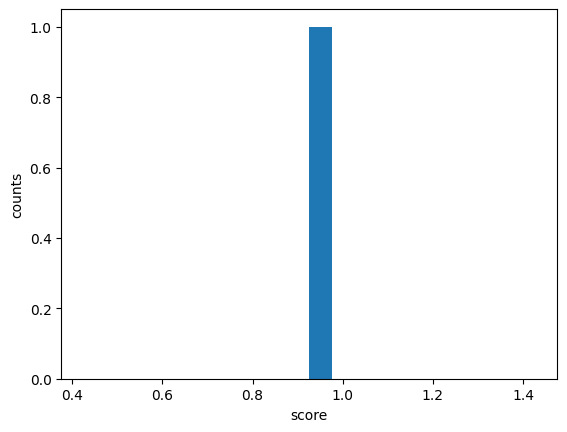

In [16]:
import matplotlib.pyplot as plt

plt.hist(F1, bins=20)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


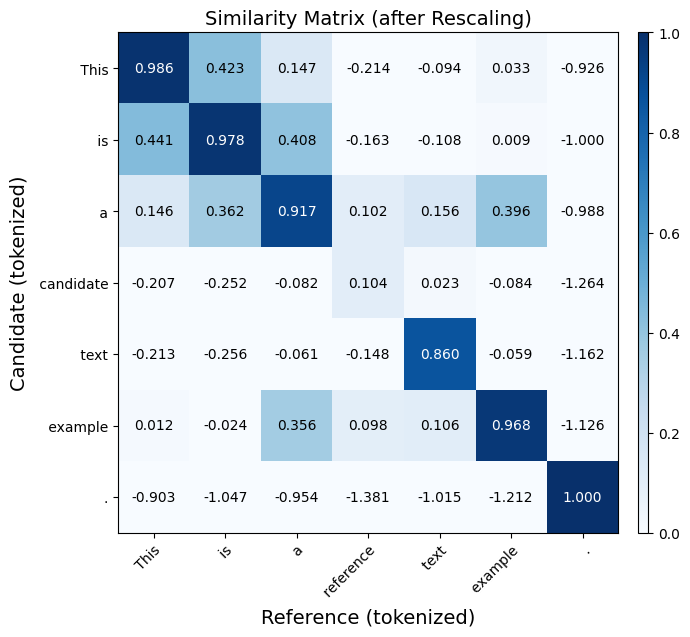

In [17]:
from bert_score import plot_example

plot_example(candidate, reference, lang="en", rescale_with_baseline=True)

## [transformers](https://haticeozbolat17.medium.com/text-summarization-how-to-calculate-bertscore-771a51022964)

In [ ]:
# Step 1: 필요한 라이브러리 임포트
from transformers import BertTokenizer, BertModel  # BERT 토크나이저와 모델
import torch
import numpy as np

# Step 2: 사전학습된 BERT 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Step 3: 비교할 두 문장 정의
text1 = "This is an example text."
text2 = "This text contains an example sentence."

# Step 4: 문장을 BERT 입력 형식으로 변환
# return_tensors="pt" → PyTorch 텐서 반환
# padding, truncation → 길이 맞춤 및 자르기
inputs1 = tokenizer(text1, return_tensors="pt", padding=True, truncation=True)
inputs2 = tokenizer(text2, return_tensors="pt", padding=True, truncation=True)

# Step 5: BERT 모델에 입력
outputs1 = model(**inputs1)
outputs2 = model(**inputs2)

# Step 6: 문장 임베딩 벡터 생성
# last_hidden_state → 토큰별 임베딩, mean(dim=1) → 문장 단위 평균
# detach().numpy() → PyTorch 텐서를 NumPy 배열로 변환
embeddings1 = outputs1.last_hidden_state.mean(dim=1).detach().numpy()
embeddings2 = outputs2.last_hidden_state.mean(dim=1).detach().numpy()

# Step 7: 코사인 유사도 계산
# 두 벡터 사이의 코사인 유사도
similarity = np.dot(embeddings1, embeddings2.T) / (np.linalg.norm(embeddings1) * np.linalg.norm(embeddings2))

# Step 8: 결과 출력
print("Similarity between the texts: {:.4f}".format(similarity[0][0]))

### Output: Similarity between the texts: 0.9000


Similarity between the texts: 0.9000


## [hugging face’s evaluate](https://huggingface.co/spaces/evaluate-metric/bertscore)

In [ ]:
from evaluate import load  # Hugging Face evaluate 라이브러리에서 load 함수 불러오기

# BERTScore 평가 지표 로드
bertscore = load("bertscore")

# 모델이 생성한 문장 리스트
predictions = ["hello world", "general kenobi"]

# 참조(reference) 문장 리스트
references = ["goodnight moon", "the sun is shining"]

# BERTScore 계산
# model_type → 사용할 BERT 모델 지정
results = bertscore.compute(
    predictions=predictions, 
    references=references,
    model_type="distilbert-base-uncased"
)

# 계산된 BERTScore 결과 출력
print(results)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

{'precision': [0.7899678945541382, 0.5584039688110352], 'recall': [0.7899678945541382, 0.5889028310775757], 'f1': [0.7899678349494934, 0.573248028755188], 'hashcode': 'distilbert-base-uncased_L5_no-idf_version=0.3.12(hug_trans=4.56.0)'}


# SemScore

## [sentence_transformers](https://www.newscatcherapi.com/blog/ultimate-guide-to-text-similarity-with-python)

In [ ]:
from sentence_transformers import SentenceTransformer, util
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# SentenceTransformer는 문장 단위 의미 벡터를 쉽게 뽑아내고, 의미 기반 유사도를 계산하도록 특화된 Transformer 모델
model = SentenceTransformer("all-mpnet-base-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [21]:
raw_sentences = ["The bottle is empty",
"There is nothing in the bottle"]
sentences = [sent.lower().split(" ") for sent in raw_sentences]

In [ ]:
# 문장 임베딩 생성
# sentences → 문장 리스트
# convert_to_tensor=True → PyTorch 텐서로 반환
embeddings = model.encode(sentences, convert_to_tensor=True)

# 문장 간 유사도 행렬 계산
similarity = []  # 유사도 행렬을 저장할 리스트

for i in range(len(sentences)):
    row = []  # 한 문장과 나머지 문장 간 유사도 저장
    for j in range(len(sentences)):
        # 코사인 유사도 계산
        # embeddings[i], embeddings[j] → 두 문장 벡터
        # .item() → 단일 값(float)으로 변환
        row.append(util.pytorch_cos_sim(embeddings[i], embeddings[j]).item())
    similarity.append(row)  # 한 행 추가

# similarity → 문장 간 코사인 유사도 행렬 (NxN)


In [23]:
import pandas as pd
import seaborn as sns

labels = [sentence for sentence in raw_sentences]

def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

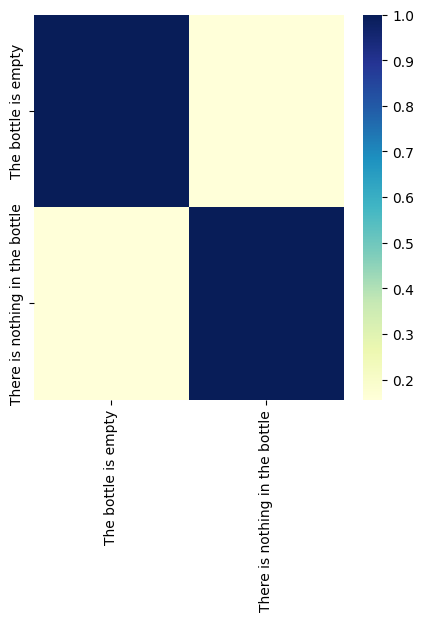

In [24]:
create_heatmap(similarity)